In [3]:
import matplotlib.pyplot as plt
from helper import *
from scipy import signal as sg
import numpy as np
import seaborn as sns

In [4]:
mySignal = 1 
file = "data/raw"+ str(mySignal) +".txt"

# Load the data and create time axes
signal = get_single_column_data(file)
time = 0.001*create_time_axes(signal)
size = np.size(signal)

In [5]:
filter = sg.butter(1, 20, 'lp', fs=1000, output='sos',)
output = sg.sosfilt(filter,np.abs(signal-np.sqrt(np.mean(signal**2))))

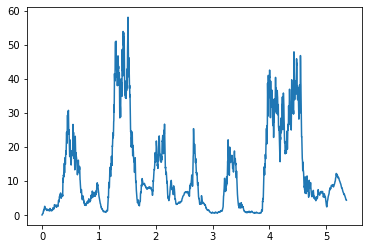

In [6]:
plt.plot(time,output)

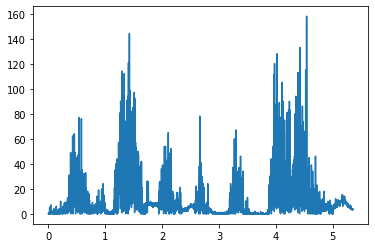

In [7]:
plt.plot(time,np.abs(signal-np.sqrt(np.mean(signal**2))))

In [8]:
def fidelite(real,filt,func = True):
    max1 =np.sqrt((np.max(filt)-np.min(real))**2)
    
    max2 = np.sqrt((np.max(real)-np.min(filt))**2)
    print(max1)
    norm = max(max1,max2)
    phi = np.sqrt((real - filt)**2)
    if func:
        return 100*phi/norm
    return 100*np.sum(phi)/(norm*len(real))   
        

def fidelite_prime(real,filt):
    return np.max(np.abs(real-filt))

def variation_totale(input,time):
    out =  input
    dt = np.diff(time)
    try:
        fprime = np.abs(np.diff(out)/dt)
    except:
        print(out, time)
        
    return np.sum(fprime)


In [9]:
def adaptive_parameters(loss,fcoup):
        return fcoup




def adaptive_filtering(signal,time):
    fcoup = 50
    step = 100
    main_filter = sg.butter(10, fcoup, 'lp', fs=1000, output='sos',)
    acc_inter = [0,10]
    output = np.zeros(len(signal))
    for i in range(1,len(signal)):
        if i%step ==0:
            base = sg.sosfilt(main_filter,np.abs(signal[i-step:i]-np.sqrt(np.mean(signal[i-step:i]**2))))
            loss = variation_totale(base,time[i-step:i])
            fcoup = adaptive_parameters(loss,fcoup)
            filter2 = sg.butter(10, fcoup, 'lp', fs=1000, output='sos',)
            output[i-step:i] = sg.sosfilt(filter2,np.abs(signal[i-step:i]-np.sqrt(np.mean(signal[i-step:i]**2))))
    
    return output

test= adaptive_filtering(signal,time)
    

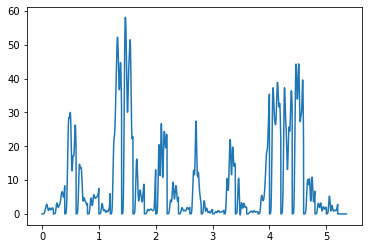

In [10]:
plt.plot(time,test)

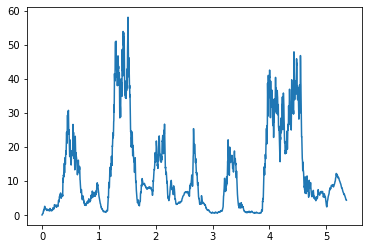

In [11]:
plt.plot(time,output)

In [16]:
def adaptive_filtering(signal,time):
    fcoup = 50
    output = np.zeros(len(signal))
    output[0] = signal[0]
    alpha = 0.04
    for i in range(1,len(signal)):
        output[i] = alpha/(alpha+1)*signal[i] + alpha/(alpha+1) * signal[i-1] - output[i-1]*(alpha-1)/(alpha+1)
        
    return output

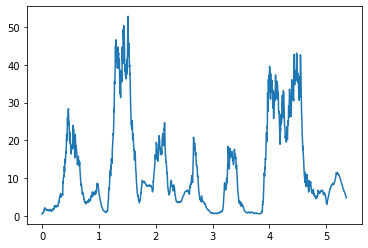

In [17]:
plt.plot(time,adaptive_filtering(np.abs(signal-np.sqrt(np.mean(signal**2))),time))

In [123]:
def moving_average(signal):
    Tw = 22
    output = np.zeros(len(signal))
    ym  = np.abs(np.mean(signal) - signal)
    return np.convolve(ym,np.ones(Tw)/Tw)

def moving_rms(singal):
    Tw = 30
    output = np.zeros(len(signal))
    ym  = np.abs(np.mean(signal) - signal)
    ym2 = np.power(ym,2)
    return np.sqrt(np.convolve(ym,np.ones(Tw)))

In [124]:
y = moving_rms(signal)
y2 = moving_average(signal)

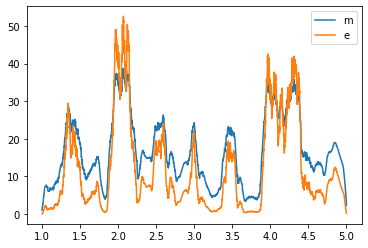

In [125]:
plt.plot(np.linspace(1,5,len(y)) ,y)
plt.legend("r")
plt.plot(np.linspace(1,5,len(y2)),y2)
plt.legend("mean")